In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})

In [ ]:
df = pd.read_csv('world-happiness-report.csv')
df.head(10)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
5,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
6,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375
7,Afghanistan,2015,3.983,7.702,0.529,53.20,0.389,0.080,0.881,0.554,0.339
8,Afghanistan,2016,4.220,7.697,0.559,53.00,0.523,0.042,0.793,0.565,0.348
9,Afghanistan,2017,2.662,7.697,0.491,52.80,0.427,-0.121,0.954,0.496,0.371


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [ ]:
df['Country name'].value_counts()

Bolivia       15
Moldova       15
Russia        15
Brazil        15
Kyrgyzstan    15
              ..
Guyana         1
Maldives       1
Oman           1
Suriname       1
Cuba           1
Name: Country name, Length: 166, dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1949.0,2013.216008,4.166828,2005.000,2010.00000,2013.0000,2017.000,2020.000
Life Ladder,1949.0,5.466705,1.115711,2.375,4.64000,5.3860,6.283,8.019
Log GDP per capita,1913.0,9.368453,1.154084,6.635,8.46400,9.4600,10.353,11.648
Social support,1936.0,0.812552,0.118482,0.290,0.74975,0.8355,0.905,0.987
Healthy life expectancy at birth,1894.0,63.359374,7.510245,32.300,58.68500,65.2000,68.590,77.100
Freedom to make life choices,1917.0,0.742558,0.142093,0.258,0.64700,0.7630,0.856,0.985
Generosity,1860.0,0.000103,0.162215,-0.335,-0.11300,-0.0255,0.091,0.698
Perceptions of corruption,1839.0,0.747125,0.186789,0.035,0.69000,0.8020,0.872,0.983
Positive affect,1927.0,0.710003,0.107100,0.322,0.62550,0.7220,0.799,0.944
Negative affect,1933.0,0.268544,0.085168,0.083,0.20600,0.2580,0.320,0.705


In [ ]:
from os import mkdir

In [ ]:
try:
    mkdir('Plots')
except:
    pass
mypath = 'Plots'

In [ ]:
df.select_dtypes(exclude='object').columns

Index(['year', 'Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect'],
      dtype='object')

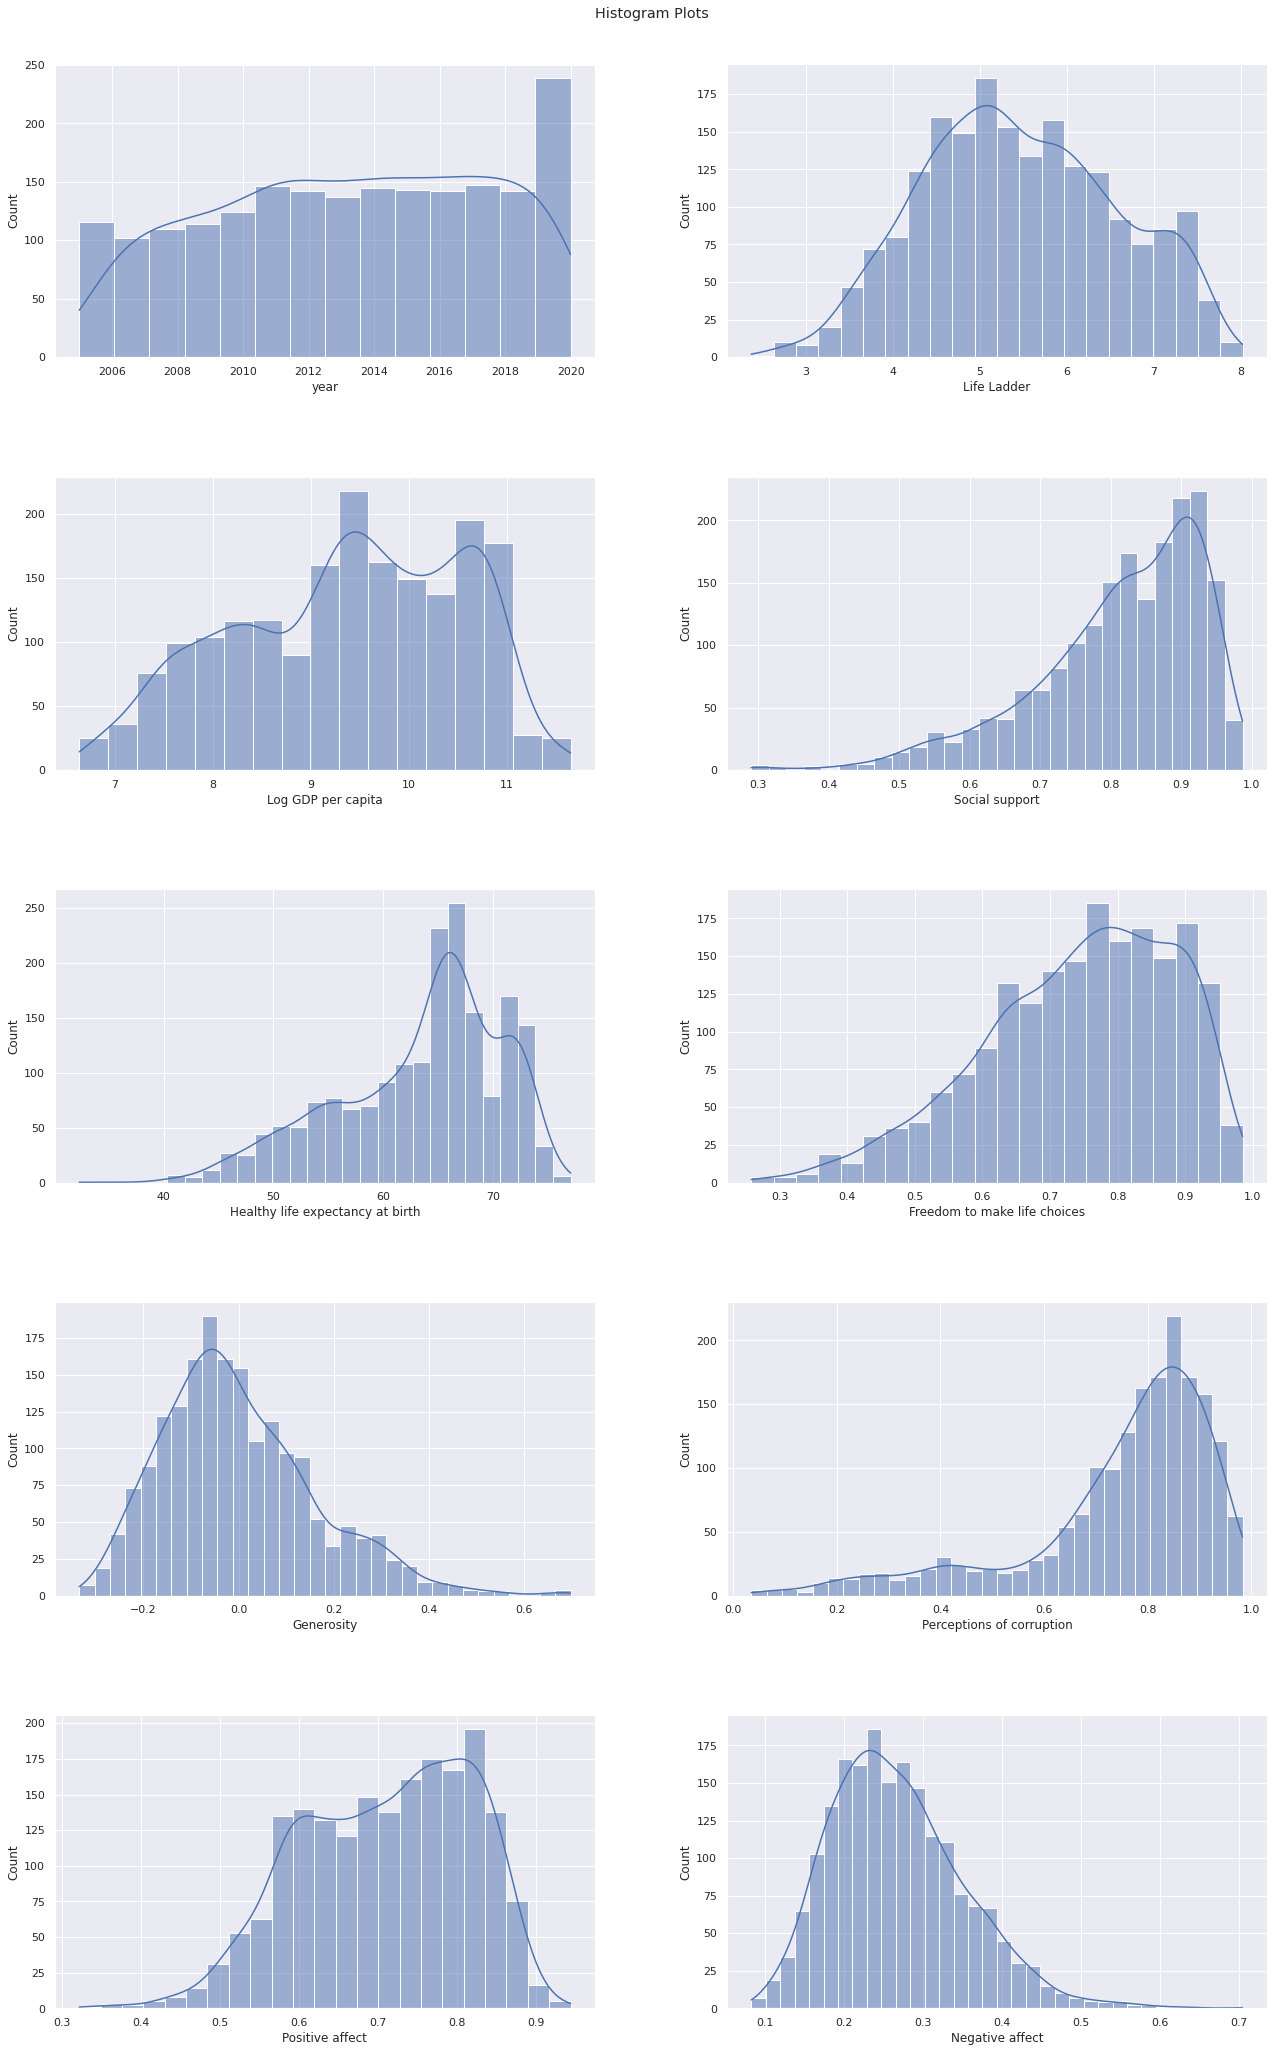

In [ ]:
f, axes = plt.subplots(5, 2, figsize=(20,30))
f.tight_layout(pad=8)
f.suptitle('Histogram Plots')
cols = df.select_dtypes(exclude='object').columns

x_axes = 0
y_axes = 0

for col in cols:
    
    sns.histplot(data=df, x=col, kde=True, ax =axes[x_axes, y_axes])
    
    if y_axes == 1:
        y_axes = 0
        x_axes += 1
        
        
    else:
        y_axes += 1

        
plt.savefig('Plots/histogram_plots.png')       
plt.show()

In [ ]:
plt.savefig('Plots/histogram_plots.png')

<Figure size 360x360 with 0 Axes>

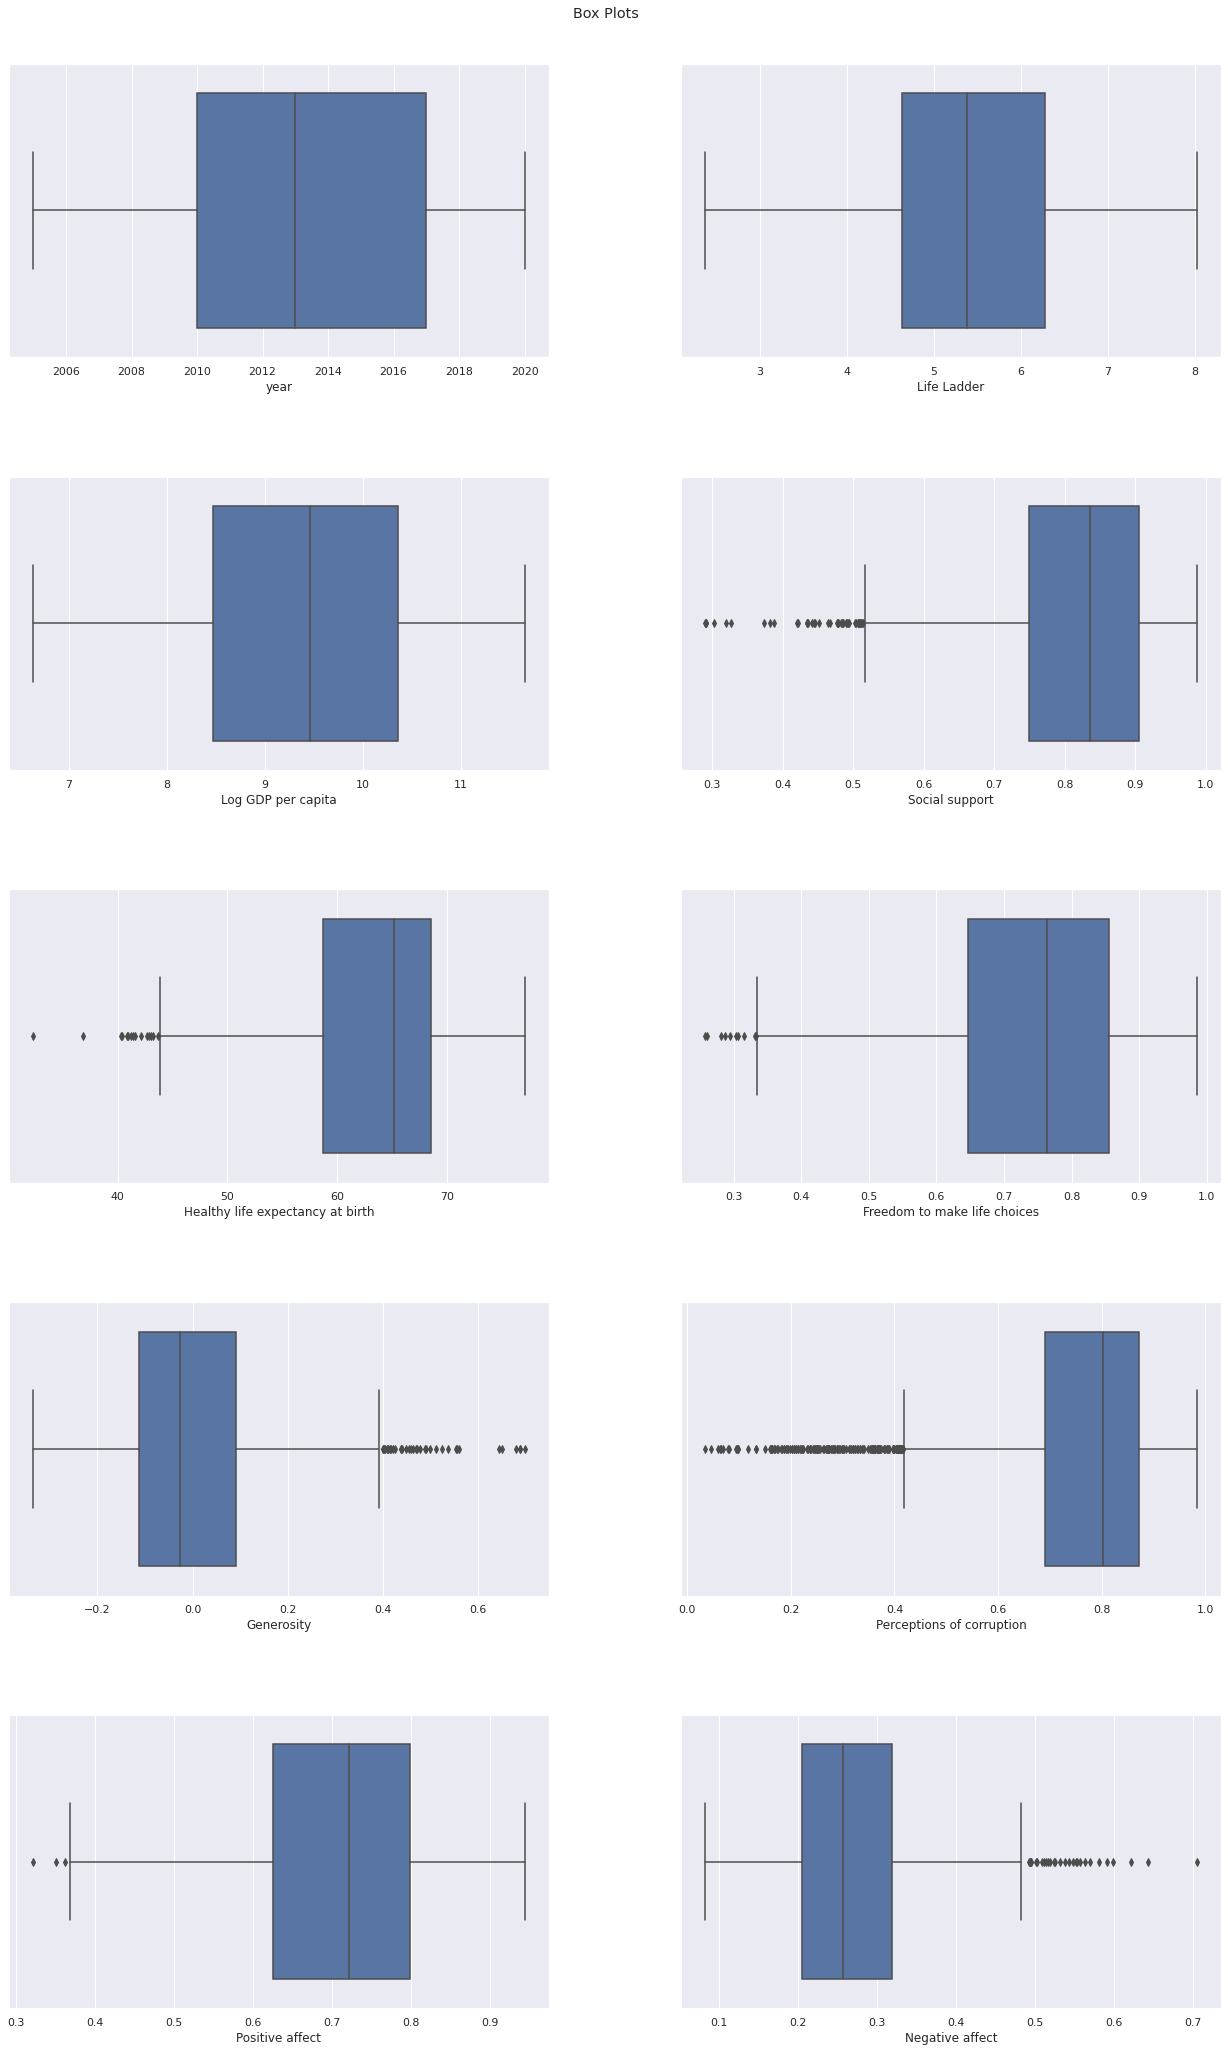

In [ ]:
f, axes = plt.subplots(5, 2, figsize=(20,30))
f.tight_layout(pad=8)
f.suptitle('Box Plots')
cols = df.select_dtypes(exclude='object').columns

x_axes = 0
y_axes = 0

for col in cols:
    
    sns.boxplot(data=df, x=col, ax =axes[x_axes, y_axes])
    
    if y_axes == 1:
        y_axes = 0
        x_axes += 1
        
        
    else:
        y_axes += 1

        
plt.savefig('Plots/box_plots.png')       
plt.show()

In [ ]:
year_group = df.groupby(by='year').sum()
year_group


,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,,,,,,,,,
2005,174.049,273.204,24.230,1809.200,20.738,0.256,17.897,19.464,6.650
2006,462.524,795.897,74.387,5292.980,62.821,0.539,62.727,63.999,22.406
2007,552.664,935.641,80.777,6191.832,69.421,1.513,77.629,71.627,25.522
2008,596.036,1008.400,86.283,6614.995,73.654,2.342,81.761,76.274,26.790
2009,622.174,1046.810,92.555,6928.501,76.989,-0.607,84.736,79.789,27.909
2010,681.604,1155.443,99.824,7631.352,86.408,0.416,90.111,85.458,28.881
2011,791.916,1346.593,116.406,8771.909,106.167,-2.079,104.218,101.726,36.328
2012,773.013,1314.683,114.887,8597.511,100.285,-0.274,100.050,100.394,36.958
2013,739.055,1274.760,110.498,8422.422,98.994,-0.021,99.254,96.110,37.157


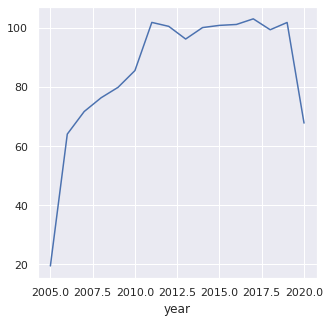

In [ ]:
year_group['Positive affect'].plot()
plt.savefig('Plots/Possitive_affect_plor.png')

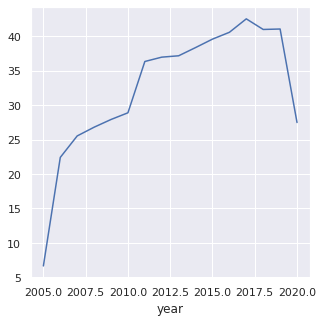

In [ ]:
year_group['Negative affect'].plot()
plt.savefig('Plots/Negative_affect_plor.png')

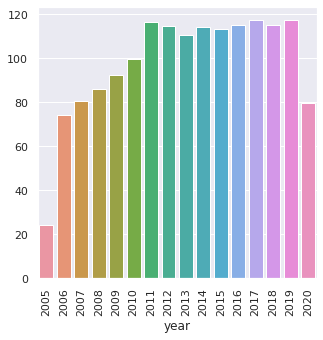

In [ ]:
ax1 = sns.barplot(x=year_group.index, y=year_group['Social support'].values)
ax1.tick_params(axis='x',rotation = 90)
plt.savefig('Plots/SocialSupport.png')

In [ ]:
df.corr()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,1.000000,0.035515,0.078246,-0.010093,0.164059,0.222151,-0.043422,-0.081478,-0.003245,0.196869
Life Ladder,0.035515,1.000000,0.790166,0.707806,0.744506,0.528063,0.190632,-0.427245,0.532273,-0.297488
Log GDP per capita,0.078246,0.790166,1.000000,0.692602,0.848049,0.367932,-0.000915,-0.345511,0.302282,-0.210781
Social support,-0.010093,0.707806,0.692602,1.000000,0.616037,0.410402,0.067000,-0.219040,0.432152,-0.395865
Healthy life expectancy at birth,0.164059,0.744506,0.848049,0.616037,1.000000,0.388681,0.020737,-0.322461,0.318247,-0.139477
Freedom to make life choices,0.222151,0.528063,0.367932,0.410402,0.388681,1.000000,0.329300,-0.487883,0.606114,-0.267661
Generosity,-0.043422,0.190632,-0.000915,0.067000,0.020737,0.329300,1.000000,-0.290706,0.358006,-0.092542
Perceptions of corruption,-0.081478,-0.427245,-0.345511,-0.219040,-0.322461,-0.487883,-0.290706,1.000000,-0.296517,0.264225
Positive affect,-0.003245,0.532273,0.302282,0.432152,0.318247,0.606114,0.358006,-0.296517,1.000000,-0.374439
Negative affect,0.196869,-0.297488,-0.210781,-0.395865,-0.139477,-0.267661,-0.092542,0.264225,-0.374439,1.000000


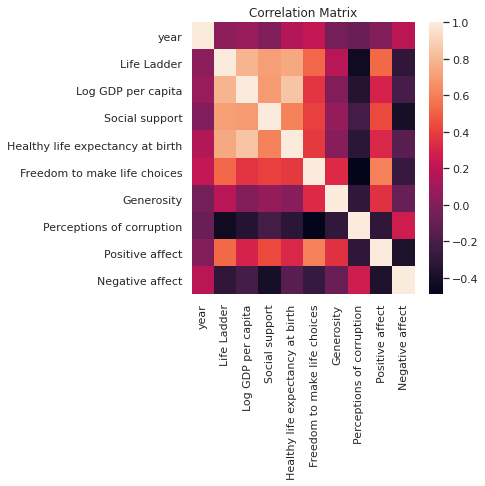

In [ ]:
sns.heatmap(df.corr())
plt.title('Correlation Matrix')
plt.savefig('Plots/CorrelationMatrix.png')

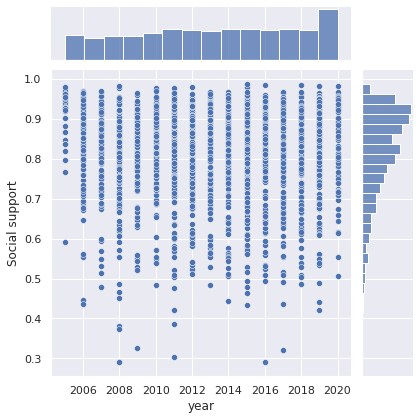

In [ ]:
sns.jointplot(data=df, x='year', y='Social support')
plt.savefig('Plots/join_plots.png')

In [ ]:
import os
from os import listdir, mkdir

In [ ]:
os.listdir('Plots')

['CorrelationMatrix.png',
 'SocialSupport.png',
 'Negative_affect_plor.png',
 'box_plots.png',
 'histogram_plots.png',
 'Possitive_affect_plor.png',
 'join_plots.png']

In [ ]:
all_files = os.listdir('Plots')
reports = [f'Plots/{file}'for file in all_files]

In [ ]:
reports

['Plots/CorrelationMatrix.png',
 'Plots/SocialSupport.png',
 'Plots/Negative_affect_plor.png',
 'Plots/box_plots.png',
 'Plots/histogram_plots.png',
 'Plots/Possitive_affect_plor.png',
 'Plots/join_plots.png']

In [ ]:
!pip install FPDF

  Created wheel for FPDF: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40722 sha256=0034c74a74a0d067bcdd19a9da8c527f19c4c2fb86be4c1a139fd180dd3b5f38
  Stored in directory: /root/.cache/pip/wheels/d7/ca/c8/86467e7957bbbcbdf4cf4870fc7dc95e9a16404b2e3c3a98c3
Successfully built FPDF


In [ ]:
from fpdf import FPDF

In [ ]:
WIDTH = 210
HEIGHT = 297

In [ ]:
pdf = FPDF()
pdf.set_font('Arial','B', 45)
pdf.add_page()

pdf.cell(190,20, txt='REPORT', align='C')


for report in reports:
  pdf.add_page()
  pdf.cell(190,20, txt=report, align='C')

  pdf.image(report, 5, 30, WIDTH-5)

pdf.output('Countries Report.pdf')

''